In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
# Read the dataset into a DataFrame
df_all = pd.read_csv('..\\data\\final\\model_metrics_all.csv')
df_teams = pd.read_csv('..\\data\\final\\model_metrics_teams.csv')

In [3]:
df_teams

,Team,Model,Accuracy,F1-Score
0,Aachen,Logistic Regression,0.666667,0.533333
1,Aachen,Decision Tree,0.583333,0.426667
2,Aachen,Random Forest,0.533333,0.526667
3,Aachen,SVM,0.483333,0.493333
4,Aachen,Neural Network,0.450000,0.433333
...,...,...,...,...
210,Wolfsburg,Logistic Regression,0.794406,0.865857
211,Wolfsburg,Decision Tree,0.722519,0.803401
212,Wolfsburg,Random Forest,0.811102,0.875755
213,Wolfsburg,SVM,0.811015,0.873948


In [4]:
# specify the data folder and file suffix
data_folder = '..\\data\\processed'
suffix = 'csv'
fullFilePaths = []

# loop through the files in the data folder
for file_name in os.listdir(data_folder):
    # check if the file name ends with the specified suffix and does not contain the excluded string
    if file_name.endswith(suffix) and 'All_93-22.csv' not in file_name:
        # if the conditions are met, add the full file path to the list
        full_file_path = os.path.join(data_folder, file_name)
        fullFilePaths.append(full_file_path)

In [5]:
#file = '..\\data\\processed\\FC Koln_93-22.csv'
# Initialize an empty DataFrame to store the row counts
row_count_df = pd.DataFrame(columns=['Team', 'Row Count'])
directory = '..\\data\\processed'

# Loop through each file in the directory
for file in os.listdir(directory):
    if file.endswith('.csv') and 'All_93-22.csv' not in file:  # Check if the file is a CSV file
        # Extract the base name and team name
        base_name = os.path.basename(file)
        team_name = base_name.split('_')[0]
        print('####', team_name)
        
        # Load the processed data
        file_path = os.path.join(directory, file)
        file_df = pd.read_csv(file_path)
        
        # Get the row count and add it to the DataFrame
        row_count = len(file_df.index)
        row_count_df = pd.concat([row_count_df, pd.Series({'Team': team_name, 'Row Count': row_count}).to_frame().T], ignore_index=True)

# Calculate the percentage
row_count_df['SeasonCount'] = np.ceil(row_count_df['Row Count'] / 17)

#### Aachen
#### Augsburg
#### Bayern Munich
#### Bielefeld
#### Bochum
#### Braunschweig
#### Cottbus
#### Darmstadt
#### Dortmund
#### Dresden
#### Duisburg
#### Dusseldorf
#### Ein Frankfurt
#### FC Koln
#### Fortuna Dusseldorf
#### Freiburg
#### Greuther Furth
#### Hamburg
#### Hannover
#### Hansa Rostock
#### Hertha
#### Hoffenheim
#### Ingolstadt
#### Kaiserslautern
#### Karlsruhe
#### Leipzig
#### Leverkusen
#### M'gladbach
#### Mainz
#### Munich 1860
#### Nurnberg
#### Paderborn
#### RB Leipzig
#### Schalke 04
#### St Pauli
#### Stuttgart
#### Uerdingen
#### Ulm
#### Union Berlin
#### Unterhaching
#### Wattenscheid
#### Werder Bremen
#### Wolfsburg


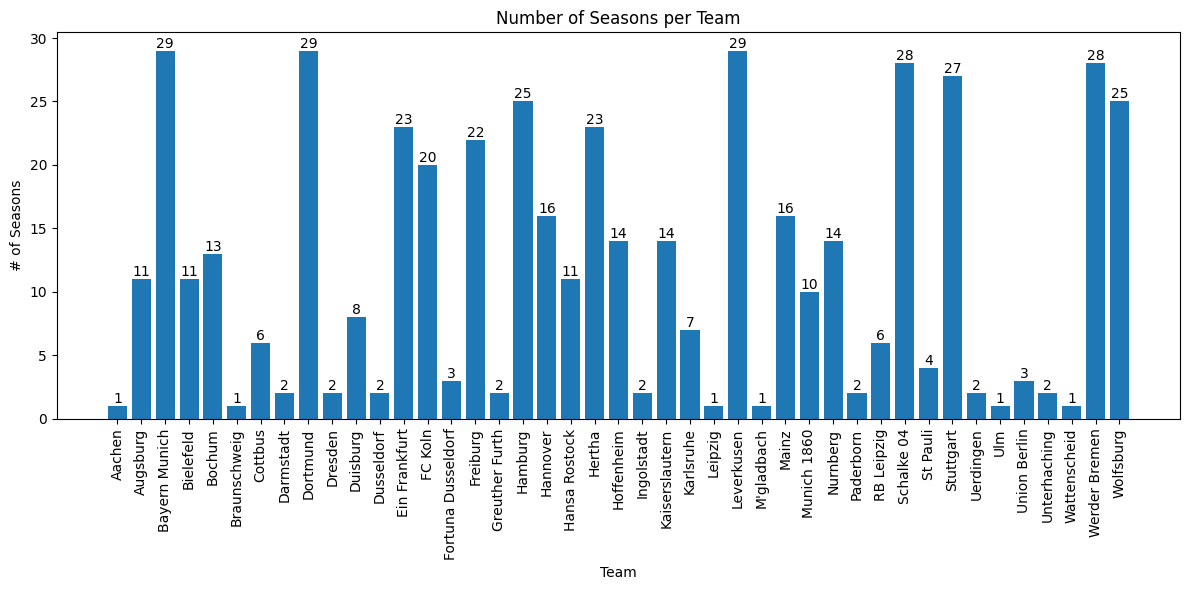

In [6]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(row_count_df)), row_count_df['SeasonCount'])
plt.xticks(range(len(row_count_df)), row_count_df['Team'], rotation=90)
plt.xlabel('Team')
plt.ylabel('# of Seasons')
plt.title('Number of Seasons per Team')

# Add season numbers to each bar
for i, count in enumerate(row_count_df['SeasonCount']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

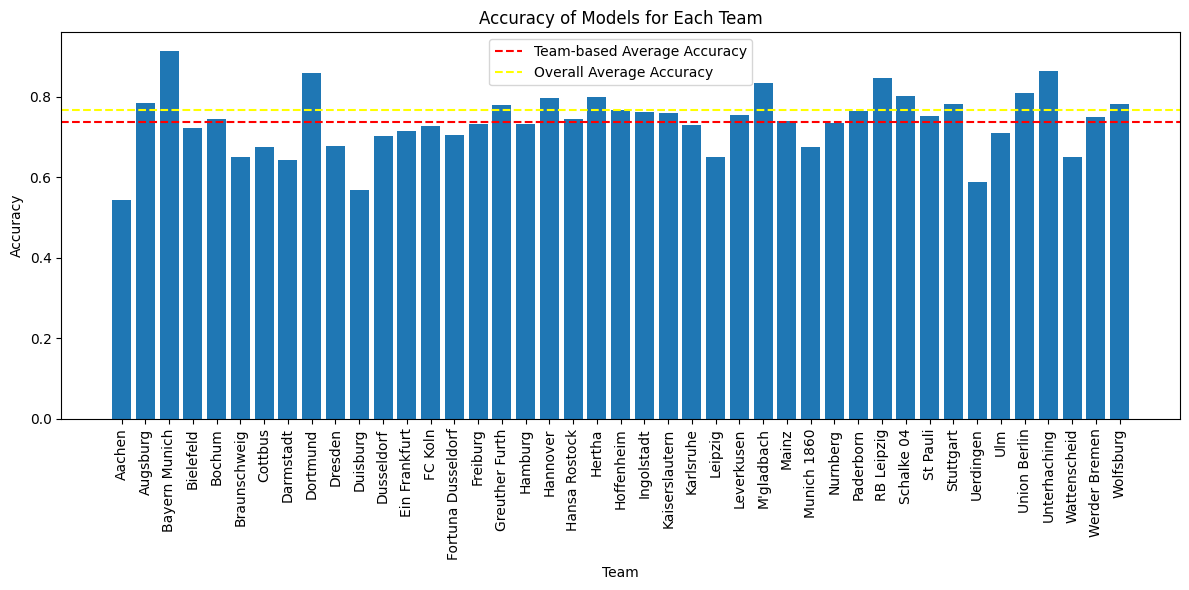

In [7]:
# Group the data by team and model, and calculate the mean accuracy
grouped_accuracy_data = df_teams.groupby(['Team'])['Accuracy'].mean().reset_index()

# Calculate the overall average accuracy
average_accuracy = grouped_accuracy_data['Accuracy'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(grouped_accuracy_data)), grouped_accuracy_data['Accuracy'])
plt.xticks(range(len(grouped_accuracy_data)), grouped_accuracy_data['Team'], rotation=90)
plt.xlabel('Team')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models for Each Team')

# Add a line for the average accuracy
plt.axhline(average_accuracy, color='red', linestyle='--', label='Team-based Average Accuracy')
plt.legend()

plt.axhline(df_all['Accuracy'].mean(), color='yellow', linestyle='--', label='Overall Average Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

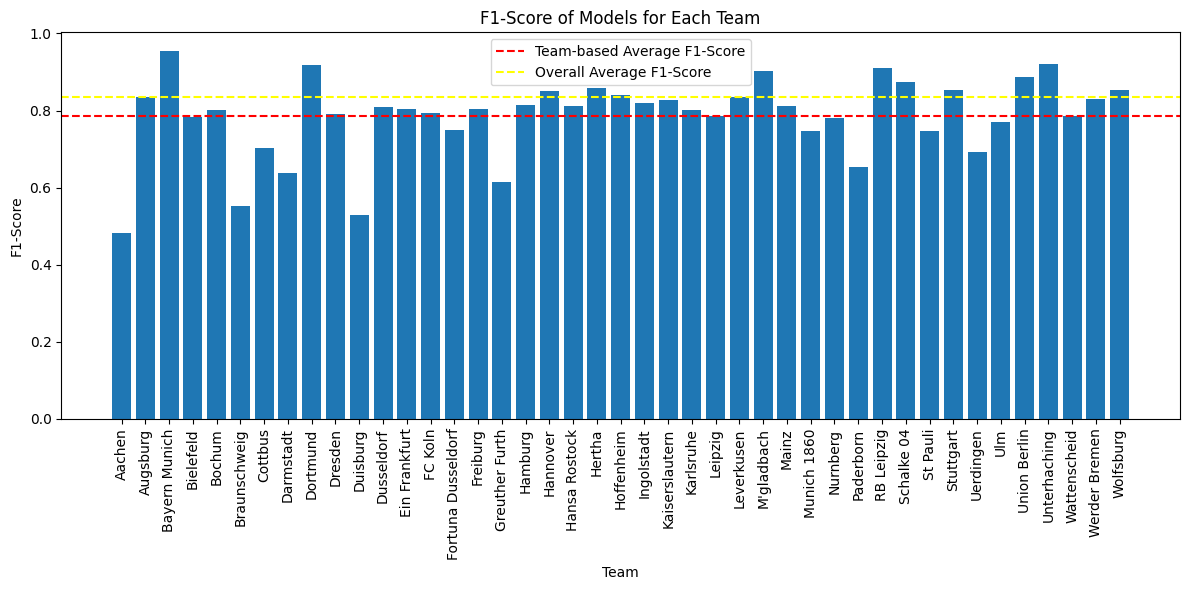

In [8]:
# Group the data by team and model, and calculate the mean accuracy
grouped_f1_data = df_teams.groupby(['Team'])['F1-Score'].mean().reset_index()

# Calculate the overall average accuracy and F1
average_f1 = grouped_f1_data['F1-Score'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(grouped_f1_data)), grouped_f1_data['F1-Score'])
plt.xticks(range(len(grouped_f1_data)), grouped_f1_data['Team'], rotation=90)
plt.xlabel('Team')
plt.ylabel('F1-Score')
plt.title('F1-Score of Models for Each Team')

# Add a line for the average accuracy
plt.axhline(average_f1, color='red', linestyle='--', label='Team-based Average F1-Score')
plt.legend()

plt.axhline(df_all['F1-Score'].mean(), color='yellow', linestyle='--', label='Overall Average F1-Score')
plt.legend()

plt.tight_layout()
plt.show()